[[6.83531218e-11 9.19925580e-10 5.45313406e-10 3.99957356e-09
  1.16873555e-14 2.17858107e-10 2.98023566e-16 1.00000000e+00
  2.00886044e-10 4.71084283e-09]]
7


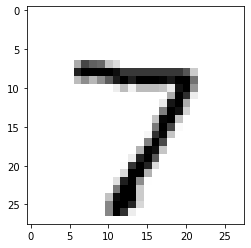

In [4]:
# (1) 学習済みモデルの読み込み
from keras.models import load_model
model = load_model('cnn.h5')

# (2) MNIST テスト画像の読み込み
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
test_images = test_images.astype('float32') / 255

# (3) 予測する画像を表示
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(test_images[0], cmap='gray_r')

# (4) 機械学習モデルによる予測
import numpy as np
pred = model.predict(test_images[0].reshape(1,28,28,1))
print(pred)


print(np.argmax(pred))

In [23]:
# (1) Canvasを表示するHTML
html= """
<canvas width="280" height="280" style="border:solid"></canvas>
<script type="text/javascript">
    var pixels = [];
    for(var i = 0; i < 28 * 28; i++) pixels[i] = 0;
    var canvas = document.querySelector("canvas");
    var drawing = false;
    
    canvas.addEventListener("mousedown", function(){
    drawing = true;
    });
    
    canvas.addEventListener("mouseup", function(){
        drawing = false;
        IPython.notebook.kernel.execute("image = [" + pixels + "]");
    });
    
    canvas.addEventListener("mousemove", function(e){
        if (drawing){
            var x = Math.floor(e.offsetX / 10);
            var y = Math.floor(e.offsetY / 10);
            if(0 <= x && x <= 27 && 0 <= y && y <= 27){
                canvas.getContext("2d").fillRect(x*10, y*10, 10, 10);
                pixels[x+y*28] = 1;
            }
        }
    })
</script>
"""

# (2) HTML の実行
from IPython.display import HTML
HTML(html)

In [24]:
# 機械学習モデルによる予測
img = np.array(image, dtype=np.float32)
pred = model.predict(img.reshape(1, 28, 28, 1))
print(np.argmax(pred))

7


In [ ]:
import numpy as np
import tensorflow as tf
from keras.models import load_model
from flask import Flask, request
from flask_cors import CORS

app = Flask(__name__)
CORS(app)
model = load_model('cnn.h5')
graph = tf.get_default_graph()

@app.route('/predict', methods=['POST'])
def predict():
    req = [int(i) for i in request.form['image'].split(',')]
    img = np.array(req, dtype=np.float32).reshape(1, 28, 28, 1)
    with graph.as_default():
        result = np.argmax(model.predict(img))
    return str(result)

if __name__ = '__main__':
    app.run()